## Imports and Functions

We begin by loading the necessary packages/modules.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Visualizing Liquidity Parameter Estimates

We continue by loading [`gamma_table.csv`](<..\models\liq_param\gamma_table.csv>) containing the table of gamma estimate values and creating plots for each indiviual ticker with all four series of estimates.

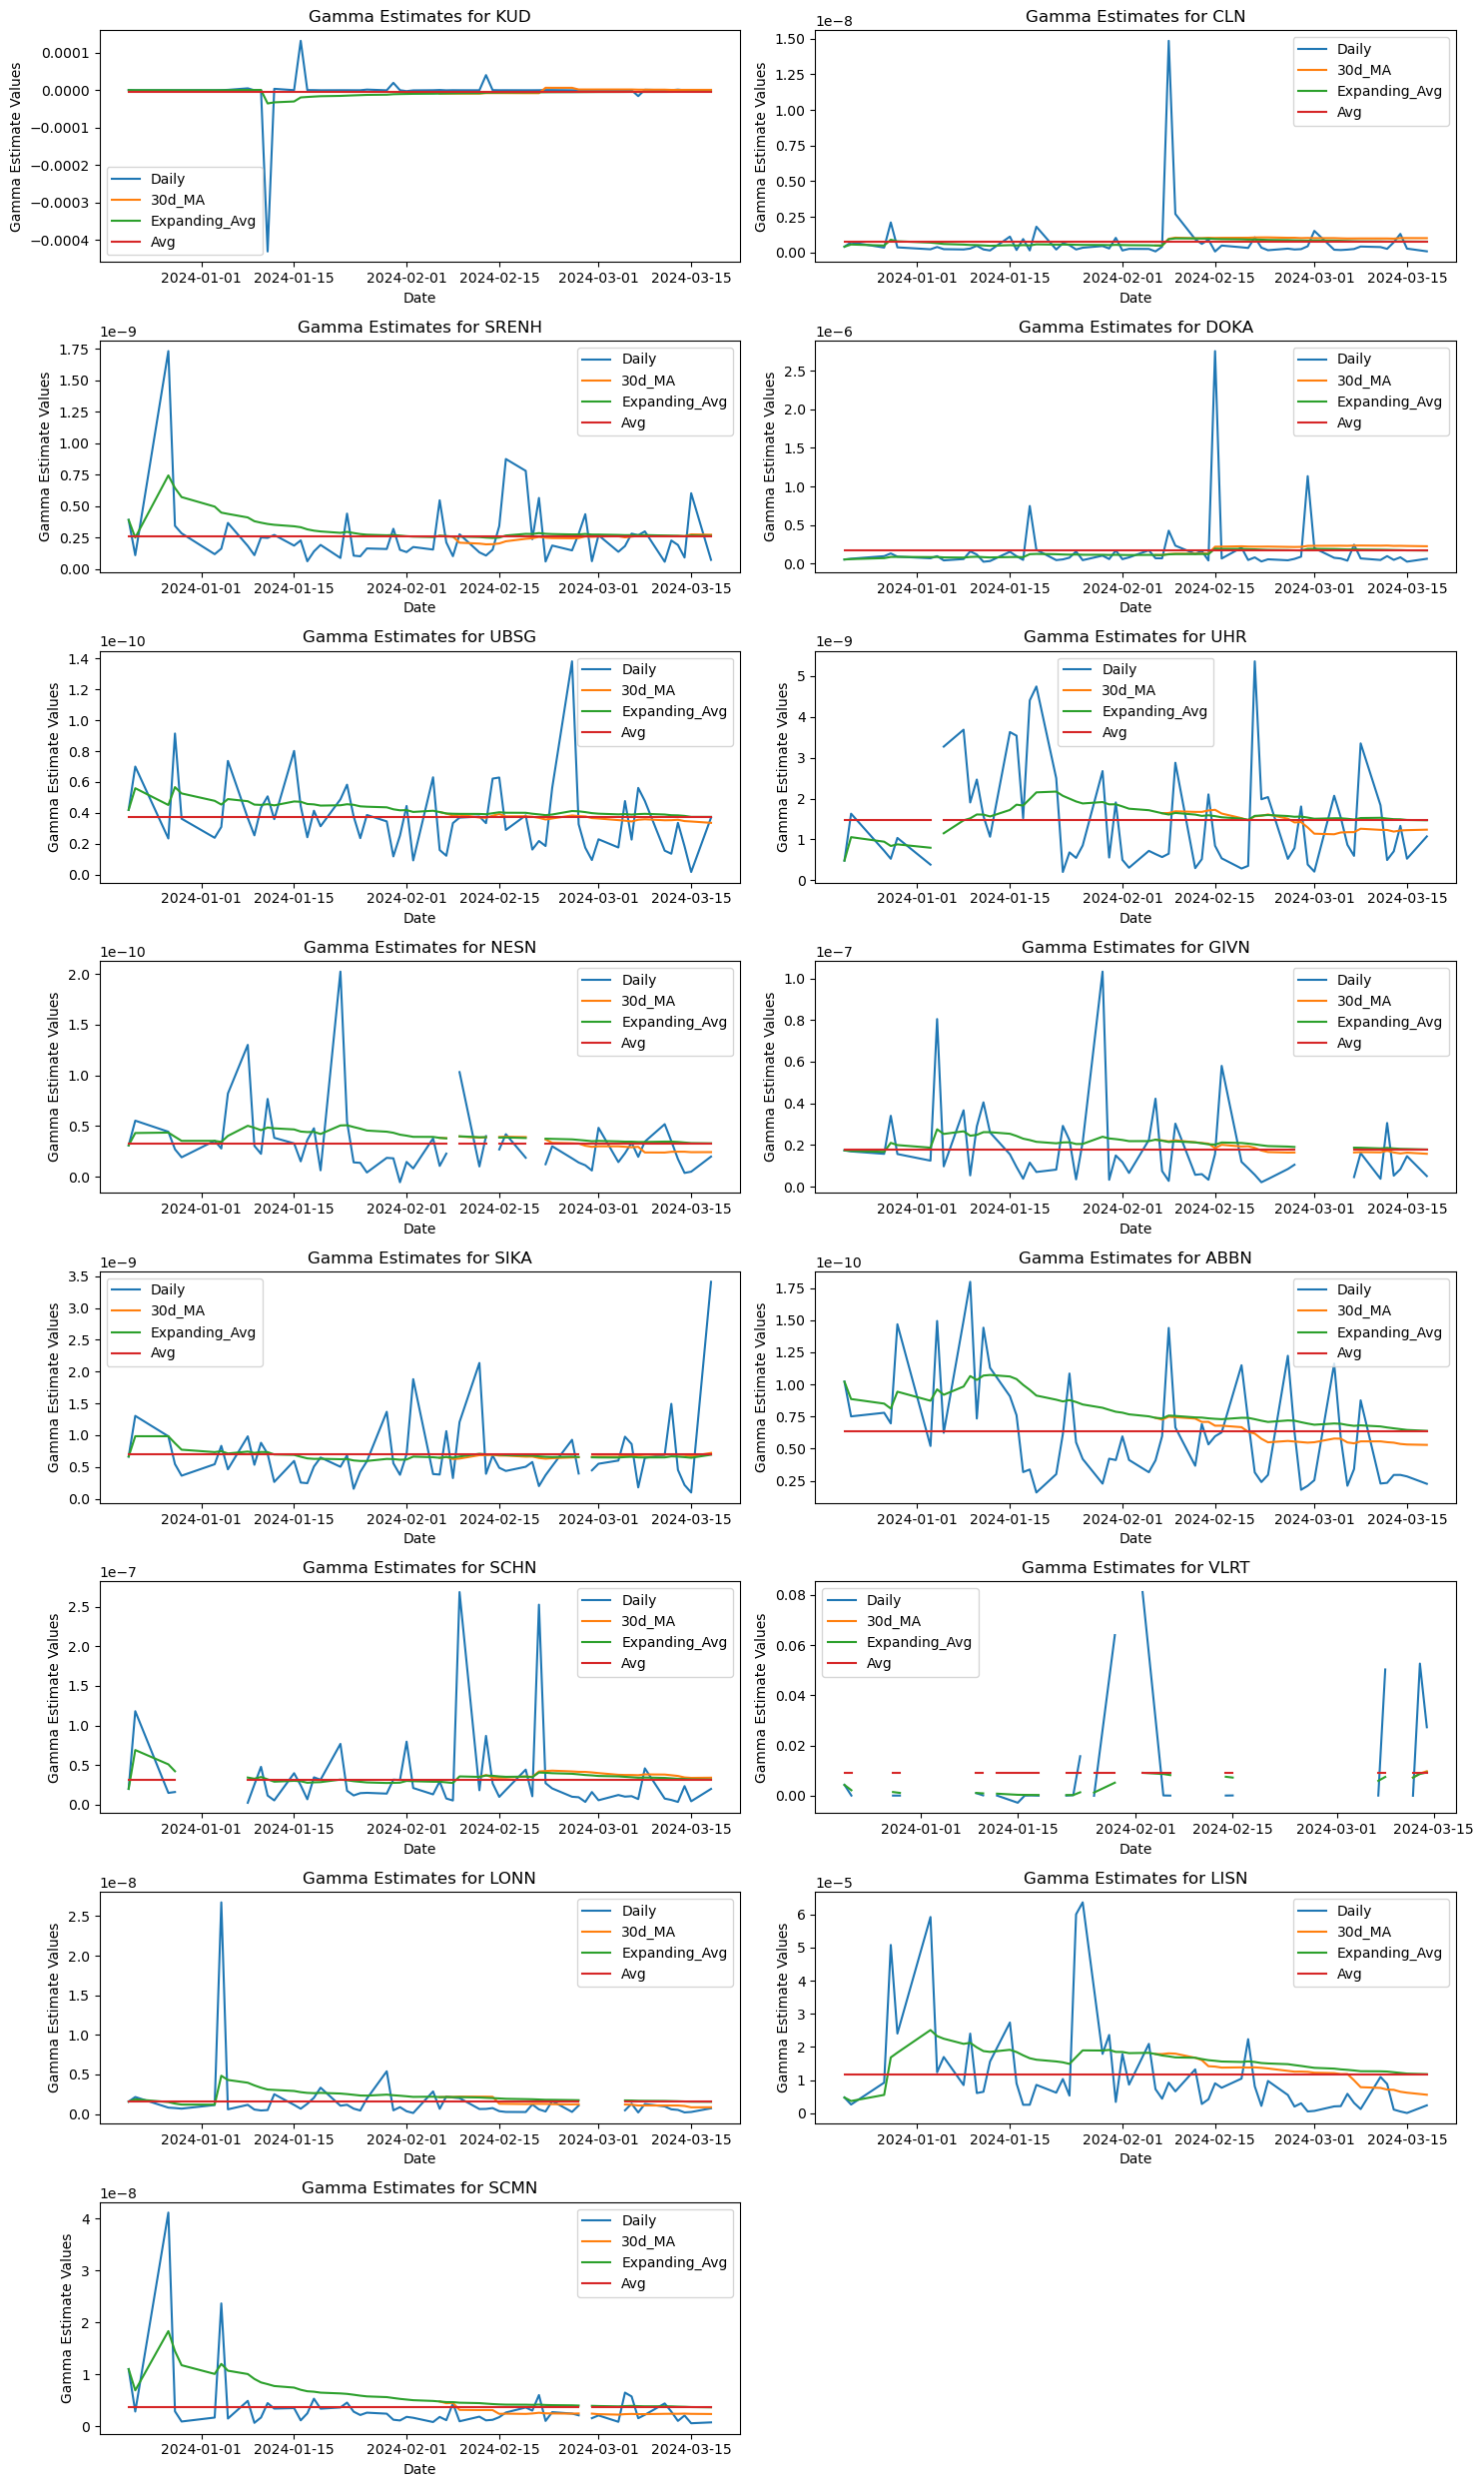

In [16]:
# load file
df = pd.read_csv(os.path.join('..', 'models', 'liq_param', 'gamma_table.csv'), parse_dates=['Date'])
df.set_index('Date', inplace=True)

# get ticker list
tickers = [col.split('_')[0] for col in df.columns if '_' in col]
tickers = list(set(tickers))

# set up grid
n_rows = 8
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 25))

# flatten axes
axes = axes.flatten()

# loop thru each ticker and plot
for i, ticker in enumerate(tickers):
    ticker_df = df[[col for col in df.columns if col.startswith(ticker + '_')]]
    ticker_df.columns = [col.split('_', 1)[1] for col in ticker_df.columns]

    for column in ticker_df.columns:
        axes[i].plot(ticker_df.index, ticker_df[column], label=column)

    axes[i].set_title(f"Gamma Estimates for {ticker}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Gamma Estimate Values")
    axes[i].legend()

# hide unused subplots if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join('..', 'reports', 'figures', 'gamma_estimates.svg'), bbox_inches='tight')
plt.show() 